##### マウント

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

<データの読み込み>

＜自作画像読み込み＞　リサイズも済ませておく

In [0]:
%pwd

'/content'

In [0]:
cd /content/drive/My Drive/sprint19

/content/drive/My Drive/sprint19


In [0]:
import glob
import numpy as np
from keras.preprocessing.image import load_img,img_to_array
import keras
import re

#イメージサイズを決定する
img_size = (224,224)

#イメージを読み込むディレクトリを指定
dir_name = '../datasets/dog_cat_images/animal_img'

#ファイルタイプを指定
file_type  = 'jpg'

#load images and image to array
img_list = glob.glob('./' + dir_name + '/*.' + file_type)


#イメージデータを格納するリストを作成
temp_dog_img_array_list = []
temp_cat_img_array_list = []


for img in img_list:
    
    # ファイル名に'dog_img'が含まれるイメージを探して格納
    if re.search('dog_img', img):
        temp_dog_img = load_img(img,grayscale=False,target_size=(img_size))
        temp_dog_img_array = img_to_array(temp_dog_img) /255 #正規化
        temp_dog_img_array_list.append(temp_dog_img_array)
    
    # ファイル名に'cat_img'が含まれるイメージを探して格納
    if re.search('cat_img', img):
        temp_cat_img = load_img(img,grayscale=False,target_size=(img_size))
        temp_cat_img_array = img_to_array(temp_cat_img) /255 #正規化
        temp_cat_img_array_list.append(temp_cat_img_array)

dog_img_array_list = np.array(temp_dog_img_array_list)
cat_img_array_list = np.array(temp_cat_img_array_list)

Using TensorFlow backend.


In [0]:
print("temp_dog_img_array_list.shape",dog_img_array_list.shape)
print("temp_cat_img_array_list.shape",cat_img_array_list.shape)

temp_dog_img_array_list.shape (10, 224, 224, 3)
temp_cat_img_array_list.shape (10, 224, 224, 3)


<データの整形>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf


X = np.concatenate([dog_img_array_list,cat_img_array_list], axis=0)
y =np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])


#ワンホットエンコーディング（多値分類問題として解く）
num_classes = 2
y = keras.utils.to_categorical(y, num_classes)


# trainとvalに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<モデル作成>

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten


input_shape=(224,224,3)
num_classes = 2


model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

W0725 11:11:08.114014 140017607403392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 11:11:08.148727 140017607403392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 11:11:08.154119 140017607403392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 11:11:08.179682 140017607403392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0725 11:11:08.226662 140017607403392 deprecation_wrapp

＜学習＞

In [0]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.0001),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=50,
                    verbose=1)

W0725 11:11:17.908968 140017607403392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 11:11:17.925323 140017607403392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0725 11:11:18.054248 140017607403392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                5972032   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

In [0]:
#推定
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

#評価
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuravy:', score[1])

y_pred_proba [4.3119475e-02 9.9929583e-01 1.1559284e-03 3.7824844e-05]
y_pred [0 1 0 0]
Test loss: 2.5571205615997314
Test accuravy: 0.75


# 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。

データ拡張のためのライブラリ

データ拡張にはalbumentationsなどがあります。

albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries

また、Kerasを使う場合はImageDataGeneratorも便利です。


データ拡張の効果の調査

データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

＜画像読み込みから＞

In [0]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# 画像ファイルをPIL形式でオープン
img_path = '../datasets/dog_cat_images/animal_img/cat_img_10.jpg'

img = image.load_img(img_path)
# PIL形式をnumpyのndarray形式に変換
x = image.img_to_array(img)
# (height, width, 3) -> (1, height, width, 3)
x = x.reshape((1,) + x.shape)

＜画像の表示関数＞

In [0]:
def show_imgs(imgs, row, col):
    """Show PILimages as row*col
     # Arguments
            imgs: 1-D array, include PILimages
            row: Int, row for plt.subplot
            col: Int, column for plt.subplot
    """
    if len(imgs) != (row * col):
        raise ValueError("Invalid imgs len:{} col:{} row:{}".format(len(imgs), row, col))

    for i, img in enumerate(imgs):
        plot_num = i+1
        plt.subplot(row, col, plot_num)
        plt.tick_params(labelbottom="off") # x軸の削除
        plt.tick_params(labelleft="off") # y軸の削除
        plt.imshow(img)
    plt.show()

＜画像ジェネレータインスタンスを作成＞

In [0]:
datagen = ImageDataGenerator(
           rotation_range=90,
           width_shift_range=10,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
            channel_shift_range=100,
           horizontal_flip=True,
           vertical_flip=True)

＜画像を追加生成＞

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


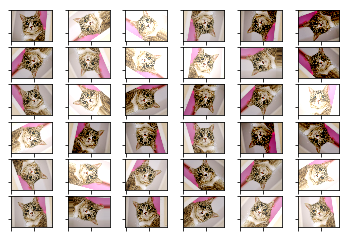

In [0]:
max_img_num = 36
imgs = []
for d in datagen.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=6, col=6)

＜その他の画像のジェネレーター＞

In [0]:
# 画像ファイルをPIL形式でオープン
img = image.load_img( '../datasets/dog_cat_images/animal_img/dog_img_10.jpg'
)
# PIL形式をnumpyのndarray形式に変換
x = image.img_to_array(img)
# (height, width, 3) -> (1, height, width, 3)
x = x.reshape((1,) + x.shape)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


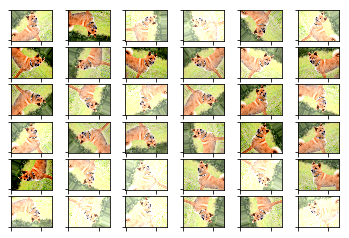

In [0]:
max_img_num = 36
imgs = []
for d in datagen.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=6, col=6)

# 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

アノテーションのためのツール

アノテーションツールにはLabelImgなどがあります。

tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images

#### VoTTで実施

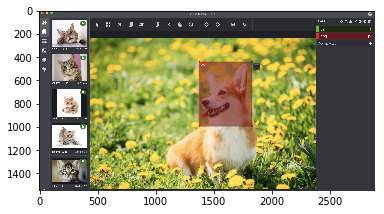

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('./description_img/VoTT_img.png')
fig, ax = plt.subplots()
ax.imshow(img)

plt.show()

# 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

In [0]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [0]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [0]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [0]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={'format': 'coco', 'min_area': min_area, 'min_visibility': min_visibility, 'label_fields': ['category_id']})

In [0]:
image =  plt.imread('../datasets/dog_cat_images/animal_img/dog_img_9.jpg')

In [0]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [[319.7987616099071, 63.83146372681607, 143.89138572256567, 161.42414860681114]], 'category_id': [1]}
category_id_to_name = {0: 'cat', 1: 'dog'}

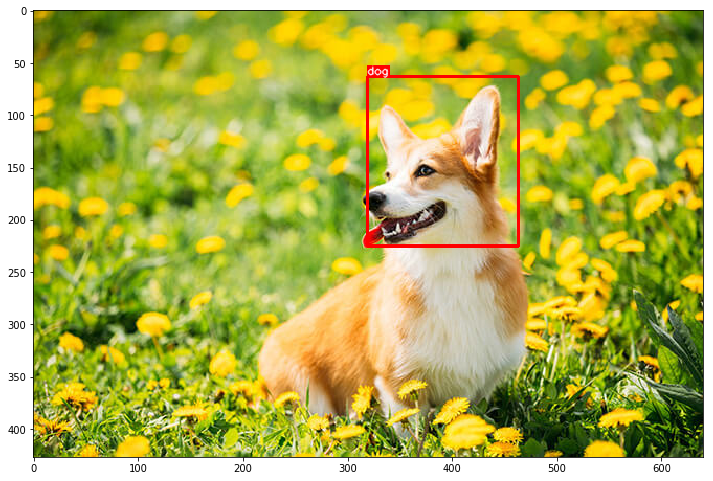

In [109]:
visualize(annotations, category_id_to_name)

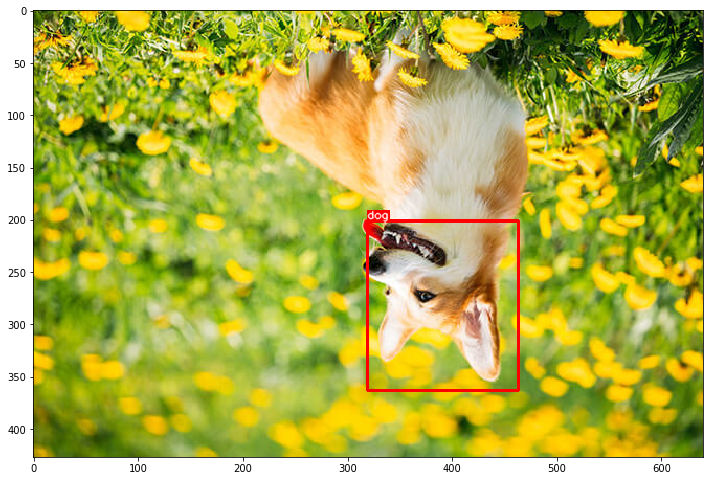

In [110]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

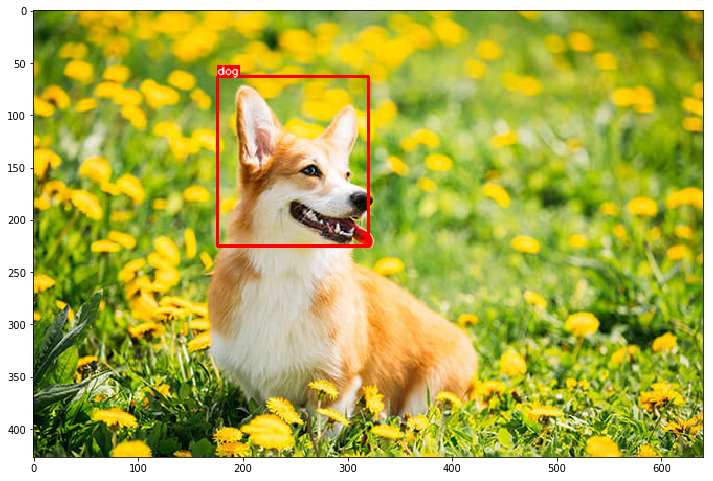

In [111]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

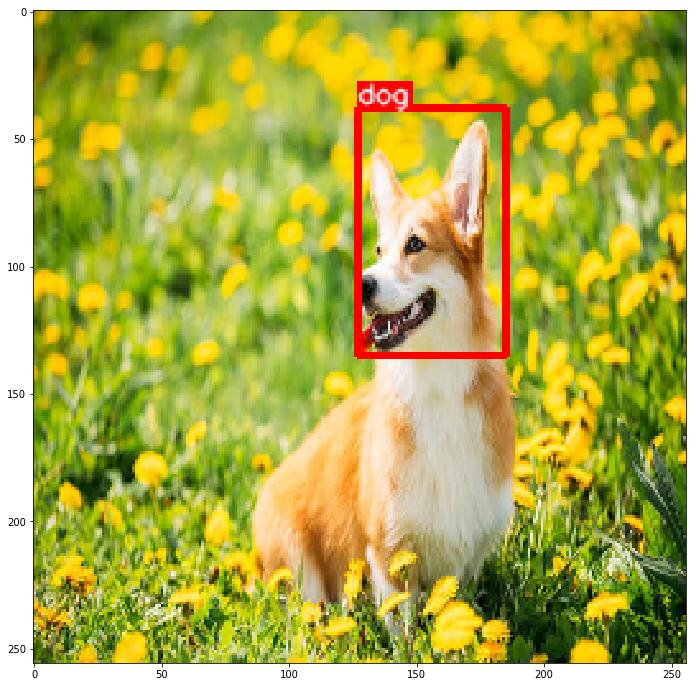

In [112]:
aug = get_aug([Resize(p=1, height=256, width=256)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

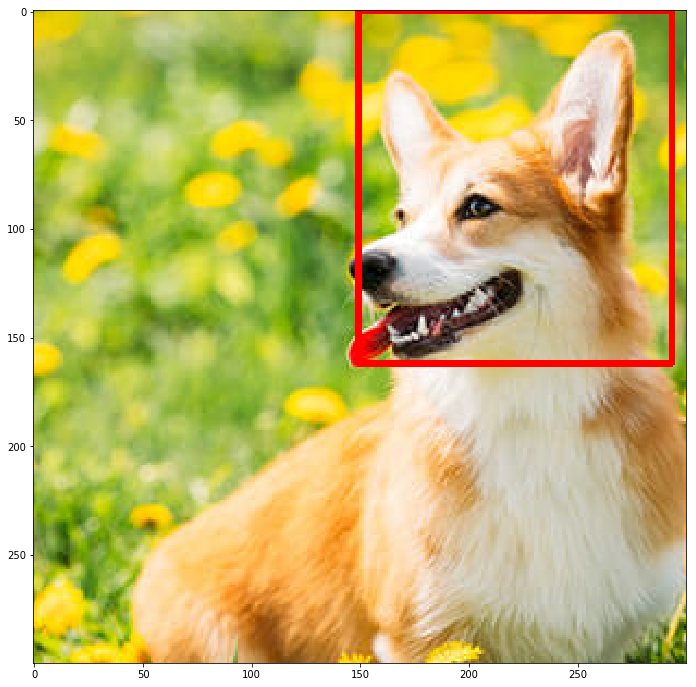

In [113]:
aug = get_aug([CenterCrop(p=1, height=300, width=300)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

[1]


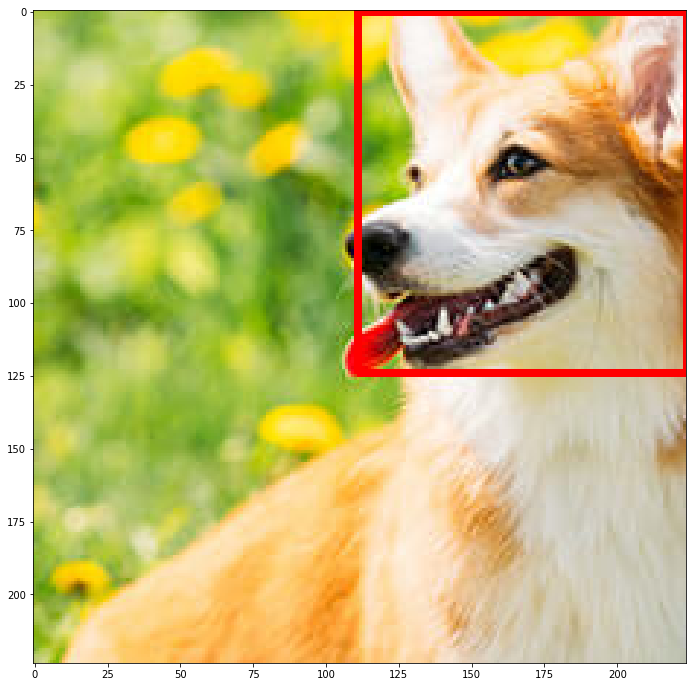

In [114]:
aug = get_aug([CenterCrop(p=1, height=224, width=224)])
augmented = aug(**annotations)
print(augmented['category_id'])
visualize(augmented, category_id_to_name)

### バウンディングボックスを含めてオーグメンテーションができることを確認した。